In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,power_transform
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import pickle


In [60]:
test=pd.read_csv('test_loan_data.csv')
test.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,...,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,...,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,NaN,NaN,704.0,700.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified


In [61]:
Best_featurs=['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_title', 'int_rate',
       'loan_amnt', 'tot_cur_bal', 'open_acc', 'revol_bal', 'revol_util',
       'sub_grade', 'total_acc']

In [62]:
df=test[Best_featurs]
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_title,int_rate,loan_amnt,tot_cur_bal,open_acc,revol_bal,revol_util,sub_grade,total_acc
0,MO,50000.0,May-2012,Tower technician,13.99,5000.0,33395.0,9.0,2568.0,9.8,C4,11.0
1,HI,92000.0,Dec-2001,Supervisor,10.99,30000.0,229832.0,11.0,30394.0,75.4,B2,35.0
2,TX,89000.0,Mar-1989,APPLICATIONS PROGRAMMER,10.15,16000.0,181616.0,15.0,38400.0,75.3,B2,41.0
3,CA,33000.0,Nov-2004,San Diego Unified School District,13.68,10000.0,30603.0,12.0,21224.0,69.4,C1,16.0
4,MI,35580.0,Feb-1997,NaN,14.09,4000.0,124597.0,8.0,3471.0,39.4,B5,19.0


In [63]:
df.shape

(20000, 12)

In [64]:
df.dropna(inplace=True)

In [65]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [66]:
numerical_columns

Index(['annual_inc', 'int_rate', 'loan_amnt', 'tot_cur_bal', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

In [67]:
categorical_columns

Index(['addr_state', 'earliest_cr_line', 'emp_title', 'sub_grade'], dtype='object')

In [68]:
# Handle outliers in numerical columns using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                          df[column].median(), df[column])
    return df




In [69]:
for colum in numerical_columns:
    handle_outliers(df,colum)

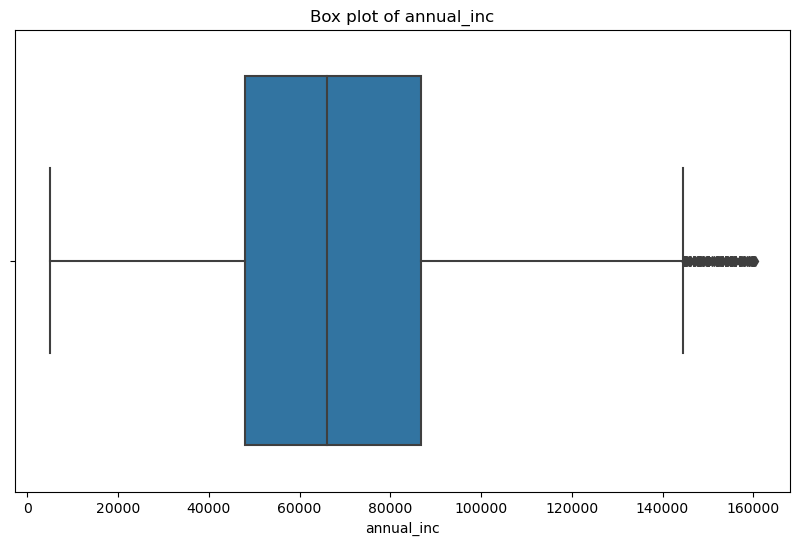

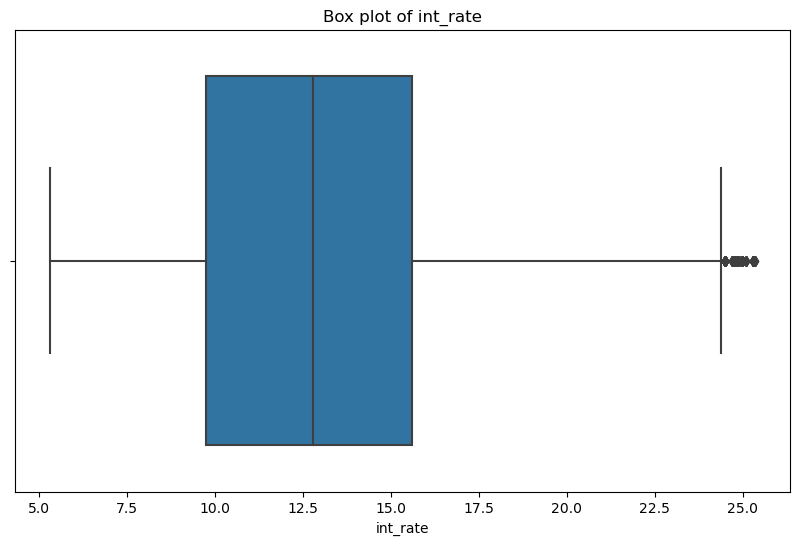

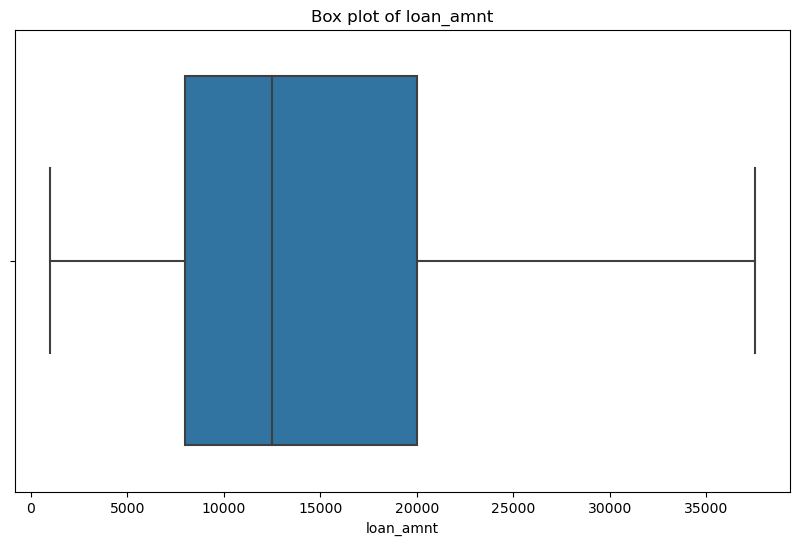

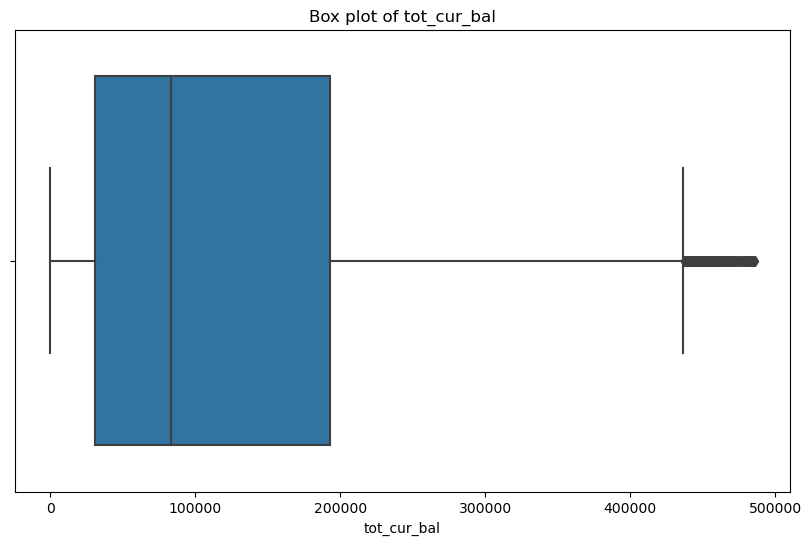

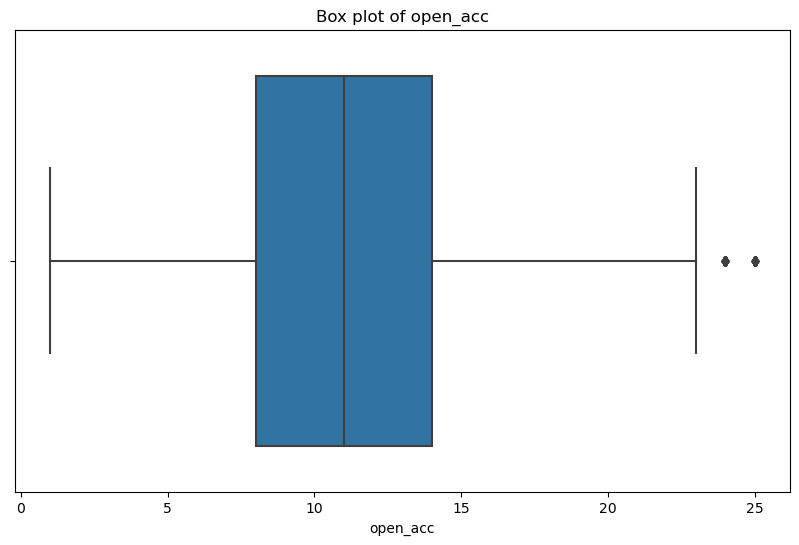

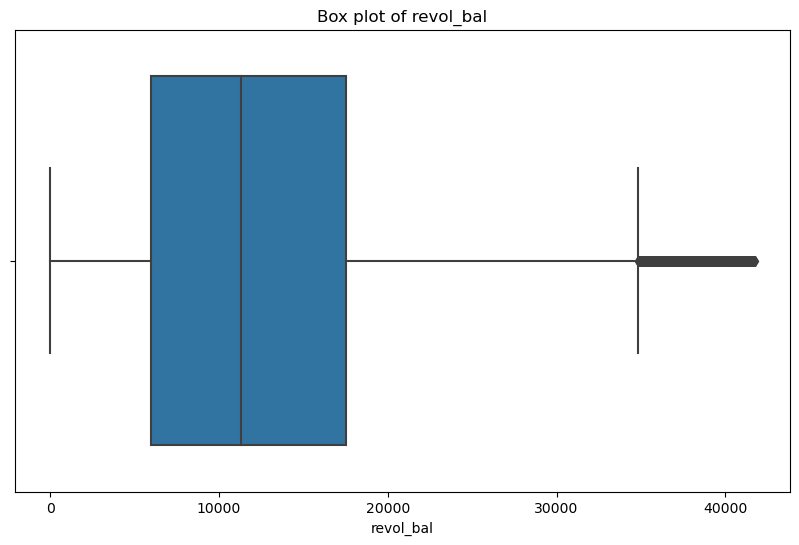

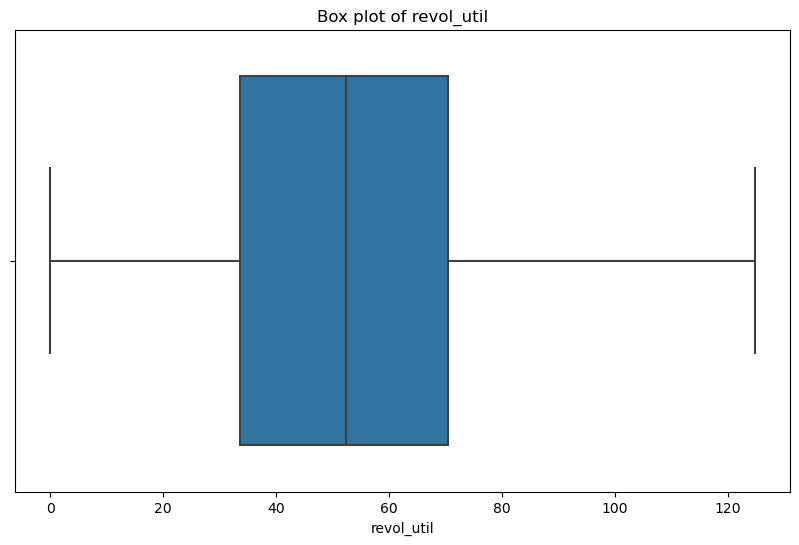

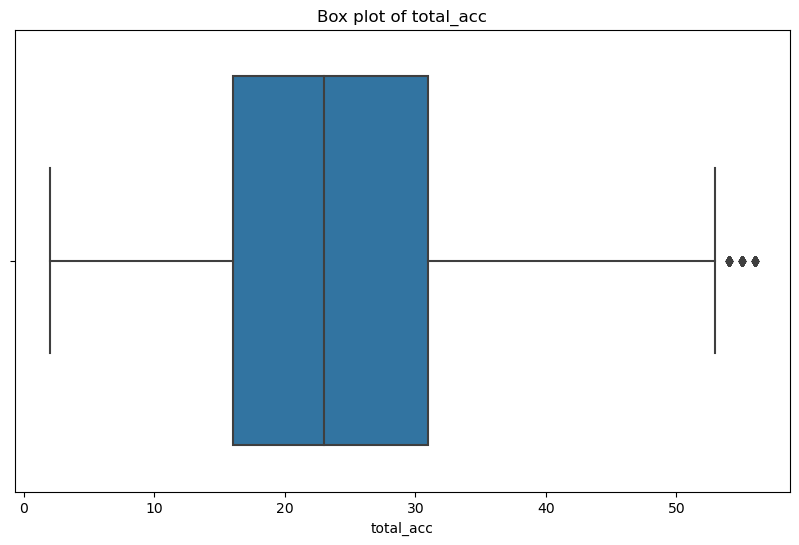

In [70]:
import matplotlib.pyplot as plt

for i in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=i)
    plt.title(f'Box plot of {i}')
    plt.show()

# lanel encoding

In [74]:
df[categorical_columns]

,addr_state,earliest_cr_line,emp_title,sub_grade
0,MO,May-2012,Tower technician,C4
1,HI,Dec-2001,Supervisor,B2
2,TX,Mar-1989,APPLICATIONS PROGRAMMER,B2
3,CA,Nov-2004,San Diego Unified School District,C1
5,MO,Aug-2000,Order processing tech,B2
...,...,...,...,...
19995,MO,Sep-2010,lighting coordinator,D4
19996,VA,Dec-1998,Contract & Compliance Manager,D4
19997,TX,May-1996,Pharmacist,B5
19998,FL,Mar-2003,Manager In Training,A5


In [76]:
for col in categorical_columns:
    lebe_encoder=LabelEncoder()
    df[col]=lebe_encoder.fit_transform(df[col])

In [77]:
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_title,int_rate,loan_amnt,tot_cur_bal,open_acc,revol_bal,revol_util,sub_grade,total_acc
0,23,50000.0,407,8318,13.99,5000.0,33395.0,9.0,2568.0,9.8,13,11.0
1,11,92000.0,119,7894,10.99,30000.0,229832.0,11.0,30394.0,75.4,6,35.0
2,42,89000.0,340,93,10.15,16000.0,181616.0,15.0,38400.0,75.3,6,41.0
3,4,33000.0,442,6890,13.68,10000.0,30603.0,12.0,21224.0,69.4,10,16.0
5,23,32510.0,74,5366,9.17,14950.0,15111.0,15.0,15111.0,41.4,6,25.0


In [78]:
sacale=StandardScaler()
df[numerical_columns]=sacale.fit_transform(df[numerical_columns])


In [79]:
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_title,int_rate,loan_amnt,tot_cur_bal,open_acc,revol_bal,revol_util,sub_grade,total_acc
0,23,-0.664505,407,8318,0.223222,-1.107218,-0.777868,-0.500442,-1.128073,-1.739250,13,-1.253042
1,11,0.737485,119,7894,-0.463263,1.783149,0.927391,-0.076022,1.907329,0.967443,6,0.968138
2,42,0.637343,340,93,-0.655479,0.164543,0.508831,0.772817,2.780665,0.963317,6,1.523434
3,4,-1.231977,442,6890,0.152285,-0.529145,-0.802105,0.136187,0.907019,0.719880,10,-0.790296
5,23,-1.248334,74,5366,-0.879731,0.043148,-0.936590,0.772817,0.240182,-0.435416,6,0.042647


In [80]:
col = df.columns
col

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_title', 'int_rate',
       'loan_amnt', 'tot_cur_bal', 'open_acc', 'revol_bal', 'revol_util',
       'sub_grade', 'total_acc'],
      dtype='object')

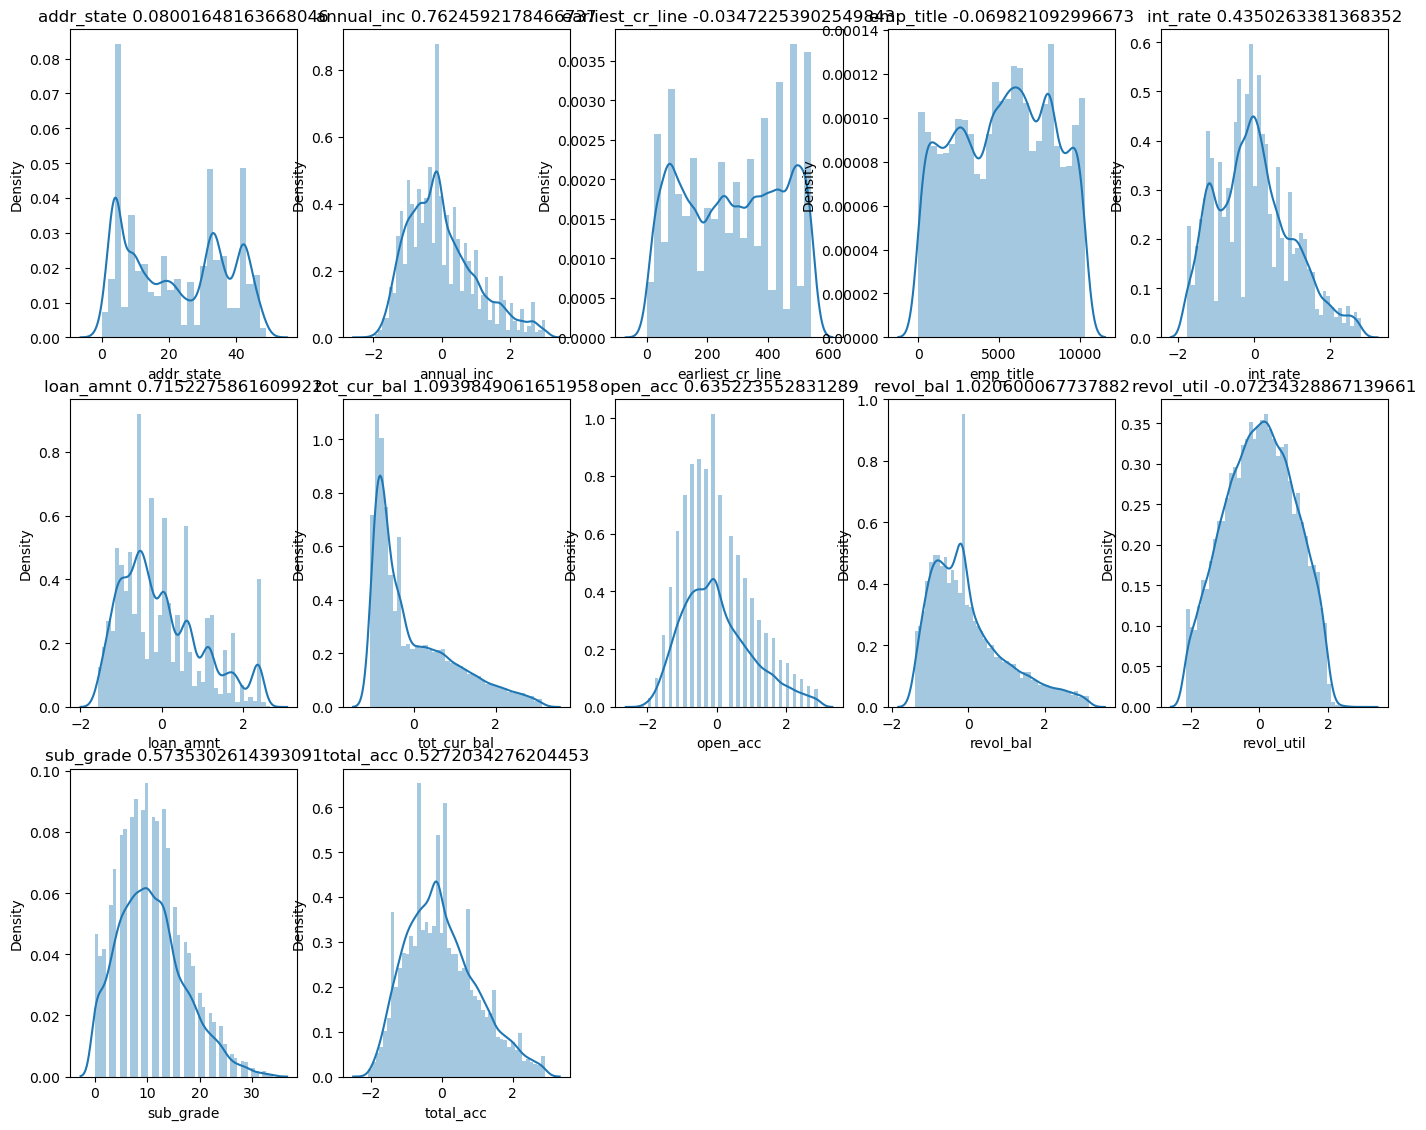

In [81]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in col :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(df[col])
    plt.title(col+' '+str(df[col].skew()))

In [82]:
from sklearn.preprocessing import PowerTransformer

# Identify numerical columns
# numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
df_yeojohnson_transformed = df.copy()

for col in numerical_columns:
    df_yeojohnson_transformed[[col]] = pt.fit_transform(df_yeojohnson_transformed[[col]])

df_yeojohnson_transformed.head()


,addr_state,annual_inc,earliest_cr_line,emp_title,int_rate,loan_amnt,tot_cur_bal,open_acc,revol_bal,revol_util,sub_grade,total_acc
0,23,-0.623961,407,8318,0.319262,-1.280380,-0.871211,-0.418236,-1.451038,-1.705370,13,-1.385362
1,11,0.843663,119,7894,-0.398608,1.558857,1.117874,0.068673,1.607587,0.968401,6,0.994226
2,42,0.762983,340,93,-0.619419,0.367422,0.844877,0.850240,1.998239,0.964119,6,1.423269
3,4,-1.453673,442,6890,0.250631,-0.431317,-0.921963,0.285343,1.032761,0.712388,10,-0.781027
5,23,-1.479346,74,5366,-0.886197,0.246710,-1.216608,0.850240,0.506716,-0.450627,6,0.167023


In [83]:
model=pickle.load(open('model_logi.pkl','rb'))


In [84]:
pred=model.predict(df_yeojohnson_transformed)
pred.T

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
predicted_categories = lebe_encoder.inverse_transform(pred)

result = pd.DataFrame(predicted_categories, columns=['loan_status'])
result.head()

,loan_status
0,A1
1,A1
2,A1
3,A1
4,A1
